In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {"axes.titlesize": 20, "axes.labelsize": 15, "lines.linewidth": 3})

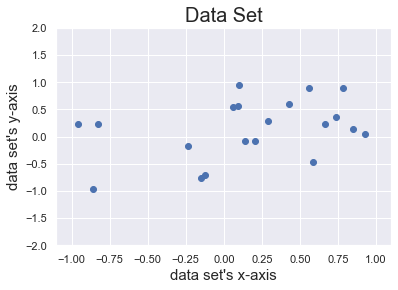

In [2]:
# Create data from -1 to 1.
np.random.seed(0)
number_of_samples = 20
X = np.random.rand(number_of_samples, 1) * 2 - 1
y = np.random.rand(number_of_samples) * 2 - 1

# Plot the data set.
plt.scatter(X, y)
plt.xlim([-1.1, 1.1])
plt.ylim([-2, 2])
plt.xlabel("data set's x-axis")
plt.ylabel("data set's y-axis")
plt.title("Data Set")
plt.show()

In [3]:
# Split the data into training/testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1)

In [4]:
def expand_dimension_for_X(X, dimension):
    
    return np.concatenate([ np.power(X, i + 1) for i in range(dimension)], axis = 1)

dimension = 8 # Higher means more severe on overfitting.
X_train_for_model = expand_dimension_for_X(X_train, dimension)
X_test_for_model = expand_dimension_for_X(X_test, dimension)

In [5]:
# Train model with linear regression.
model = LinearRegression().fit(X_train_for_model, y_train)
print("Coefficients:", model.coef_)
print("Bias:", model.intercept_)

Coefficients: [  -7.86216906   -9.80853039  160.51863617 -256.79288727  -78.28559731
  391.07787578 -205.77724715    5.12315686]
Bias: 1.1962480550322927


In [6]:
# Make predictions using both training set and testing set.
y_train_pred = model.predict(X_train_for_model)
y_test_pred = model.predict(X_test_for_model)

Training result:
MSE: 		0.04
R_squared: 	0.69


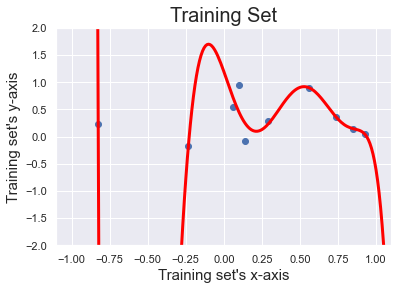

-------------------------------------------------------
Testing result:
MSE: 		2846.39
R_squared: 	-7506.98


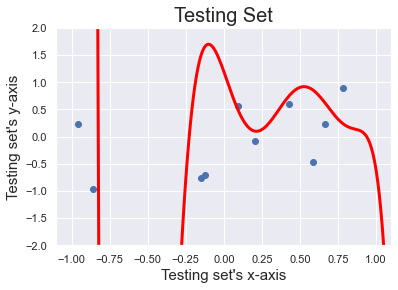

-------------------------------------------------------


In [7]:
def plot_result(X, y, y_pred, title):
    
    # Print result.
    print("{title} result:".format(title = title))
    print("MSE: \t\t{mse:.2f}".format(mse = mean_squared_error(y, y_pred)))
    print("R_squared: \t{r_squared:.2f}".format(r_squared = r2_score(y, y_pred)))
    
    # Plot X and y.
    plt.scatter(X, y)
    
    # Plot model (function_curve).
    X_function_curve = np.arange(-2, 2, 0.01).reshape(-1, 1) # Remember to reshape to 2d.
    y_function_curve = model.predict( expand_dimension_for_X(X_function_curve, dimension) )
    plt.plot(X_function_curve, y_function_curve, color = "red")
    
    plt.xlim([-1.1, 1.1])
    plt.ylim([-2, 2])
    plt.xlabel("{title} set's x-axis".format(title = title))
    plt.ylabel("{title} set's y-axis".format(title = title))
    plt.title("{title} Set".format(title = title))
    plt.show()
    print("-------------------------------------------------------")
    
# Show training result.
plot_result(X_train, y_train, y_train_pred, "Training")
plot_result(X_test, y_test, y_test_pred, "Testing")

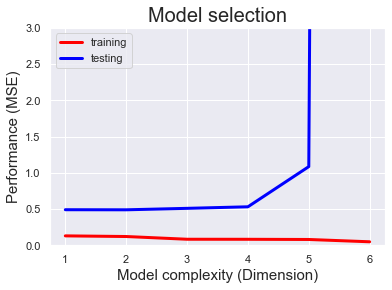

In [8]:
dimension_list = list(range(1, 7))
training_mse_list = []
testing_mse_list = []
for dimension in dimension_list:
    
    X_train_for_model = expand_dimension_for_X(X_train, dimension)
    X_test_for_model = expand_dimension_for_X(X_test, dimension)
    
    # Train model with linear regression.
    model = LinearRegression().fit(X_train_for_model, y_train)
    
    # Make predictions using both training set and testing set.
    y_train_pred = model.predict(X_train_for_model)
    training_mse_list.append( mean_squared_error(y_train, y_train_pred) )
    
    y_test_pred = model.predict(X_test_for_model)
    testing_mse_list.append( mean_squared_error(y_test, y_test_pred) )

# Plot the result.
plt.plot(dimension_list, training_mse_list, color = "red",  label = "training")
plt.plot(dimension_list, testing_mse_list,  color = "blue", label = "testing")
plt.ylim([0, 3])
plt.xlabel("Model complexity (Dimension)")
plt.ylabel("Performance (MSE)")
plt.title("Model selection")
plt.legend()
plt.show()